<a href="https://colab.research.google.com/github/AyumiOsawa/USS2024_hackathon/blob/main/tiktok_usas_emotion_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# ⚛ **SENTIMENT CLASSIFICATION USING USAS SEMATIC TAGGER** ⚛
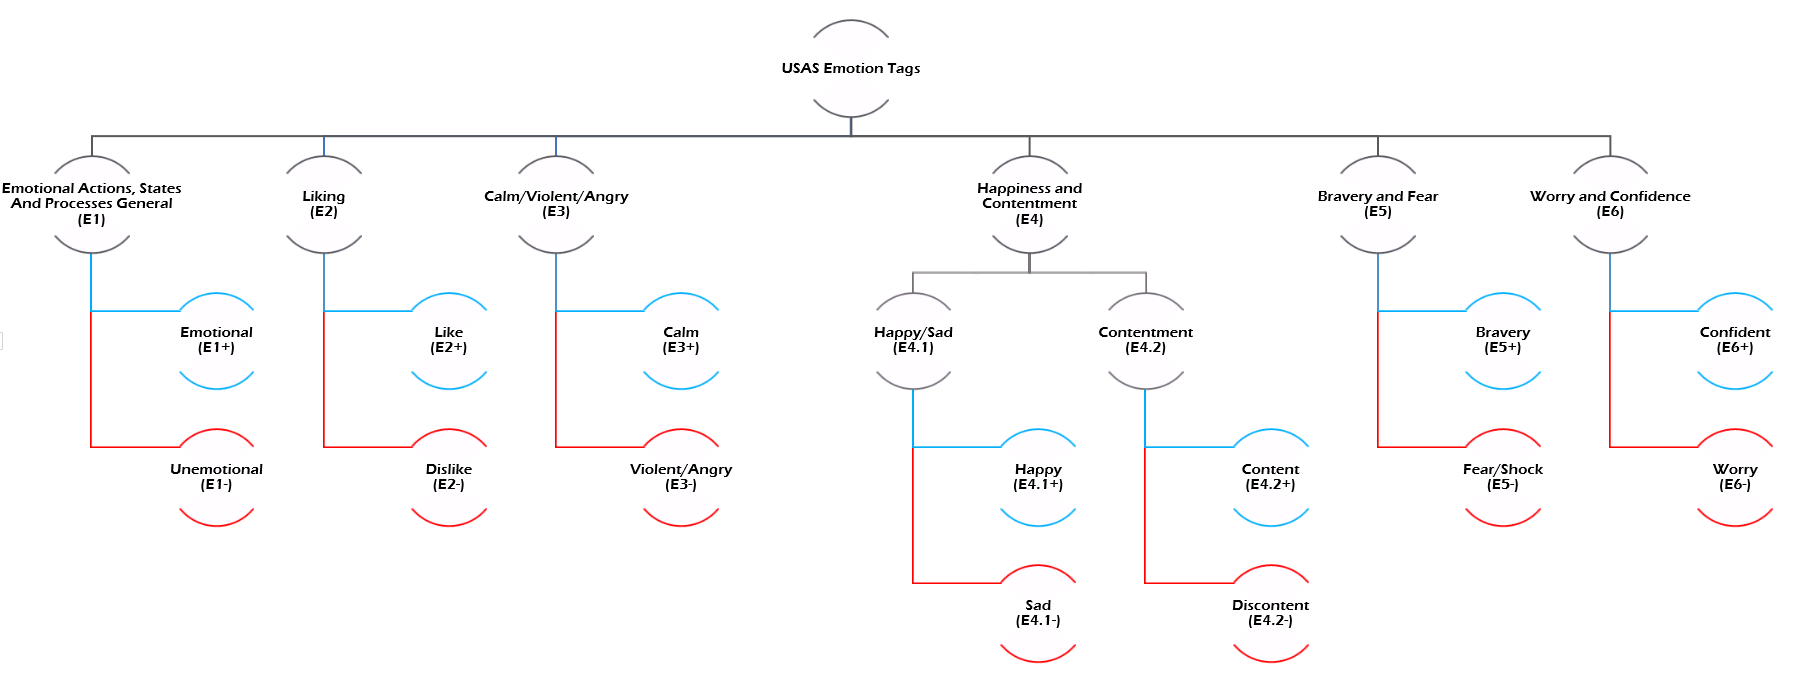
---
---



In [1]:
usas_emo_cls_dict = {'E1': 'Emotional Actions, States And Processes General',
 'E1+': 'Emotional',
 'E1-': 'Unemotional',
 'E2': 'Liking',
 'E2+': 'Like',
 'E2-': 'Dislike',
 'E3': 'Calm/Violent/Angry',
 'E3+': 'Calm',
 'E3-': 'Violent/Angry',
 'E4': 'Happiness and Contentment',
 'E4.1': 'Happy/sad',
 'E4.1+': 'Happy',
 'E4.1-': 'Sad',
 'E4.2': 'Contentment',
 'E4.2+': 'Content',
 'E4.2-': 'Discontent',
 'E5': 'Bravery and Fear',
 'E5+': 'Bravery',
 'E5-': 'Fear/shock',
 'E6': 'Worry and confidence',
 'E6+': 'Confident',
 'E6-': 'Worry'}

---
### **STEP 1: Downloading and installing the dependencies:**
>>**English PyMUSAS RuleBasedTagger**

>>**English spaCy pipeline**

>>**colorama:** *Colorama is a Python module that displays colored output in consoles.*
---



In [2]:
!pip install https://github.com/UCREL/pymusas-models/releases/download/en_dual_none_contextual-0.3.3/en_dual_none_contextual-0.3.3-py3-none-any.whl
!python -m spacy download en_core_web_sm
!pip install colorama

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 902.0/902.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.5/97.5 kB 3.5 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 8.1.7
    Uninstalling click-8.1.7:
      Successfully uninstalled click-8.1.7
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 40.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


---
### **STEP 2: Creating the tagger**

---



In [3]:
import spacy

# We exclude the following components as we do not need them.
nlp = spacy.load('en_core_web_sm', exclude=['parser', 'ner'])
# Load the English PyMUSAS rule-based tagger in a separate spaCy pipeline
english_tagger_pipeline = spacy.load('en_dual_none_contextual')
# Adds the English PyMUSAS rule-based tagger to the main spaCy pipeline
nlp.add_pipe('pymusas_rule_based_tagger', source=english_tagger_pipeline)

---

### **STEP 3: Importing the libraries**

---



In [4]:
import re
import pandas as pd
import numpy as np
from colorama import Fore, Back, Style

import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


---

# **[USAS TAGS](https://ucrel.lancs.ac.uk/usas/Lancaster_visual/Frames_Lancaster.htm)**

---

### **STEP 4: Tagging text:** *tag_text function*

>>**input:** piece of text

>>**output:** python dictionary where *keys* represent the index of a sentence in the input text and *values* represent the usas semantic tags for that sentence

---



In [21]:
# Defining the tagging function
def tag_text(text):
  usas_eval_tags = {}
  usas_list = {}
  print(text)
  sentences = nltk.sent_tokenize(text)
  print(sentences)
  for i in range(len(sentences)):
    if(sentences[i]):
      print(Fore.GREEN + Style.BRIGHT + "------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
      print(Fore.CYAN + Style.BRIGHT + f"Sentence {i}:", sentences[i])
      print(Fore.CYAN + Style.BRIGHT + "------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
      sent = nlp(sentences[i])
      for token in sent:
        tags = token._.pymusas_tags
        print(Fore.CYAN + f'{token.text}:' + Fore.GREEN, tags)
        for tag in tags:
          usas_list[token.text] = token._.pymusas_tags
      usas_eval_tags[i] = usas_list
  return usas_eval_tags

In [24]:
# Input text 1
text_1 = open("/content/@itscaitlinhello TikTok Analytic Report By Analisa.txt", "r")
text = text_1.read()

In [25]:
# Tagging input text 1
print(text)

text1_tags = tag_text(text)

Caption
How peculiar! #fyp #foryou #foryoupage #pov #meme #actress 
THE WASPS ARE COMING! Practice your British accents at visitbritain.com/fakebrit and maybe you can land a second husband next time you're in Great Britain! #fakebritchallege #lovegreatbritain #ad 
Shes lived. #fyp #foryou #foryoupage #pov #losangeles #waitress 
OUT OF POCKET #fyp #foryou #fyp #doctors #doctorsoffice #pov 
Thank you to Martin Bulge, especially. #fyp #foryou #foryoupage #oscars #oscars2023 #awardshow #awardsseason2023 
??I LOVE YOUR SON ??#fyp #foryou #foryoupage #pov #christmas #proposal
Happy thanksgiving, respectfully. #fyp #foryou #foryoupage #thankagiving #HuluChippendalesDance 
She has a secret. And it�s sad. #fyp #foryou #foryoupage #movies #pov #oscarmovies #yellowstonetv 
Naked, WET. #fyp #foryou #foryoupage #halloween #cousins #comedianoftheyear 
Good friend dinner with friends. #fyp #foryou #foryoupage #kardashians #kardashianshulu #kimkardashian 
Avery:????? #fyp #foryou #foryoupage #parents 

In [26]:
# Output tags text 1
text1_tags

{0: {'Caption': ['Q1.2'],
  '\n': ['Z99'],
  'How': ['Z5', 'A13.3'],
  'peculiar': ['A6.2-', 'A4.2+'],
  '!': ['PUNCT'],
  '#': ['Z99'],
  'fyp': ['Z99'],
  'foryou': ['Z99'],
  'foryoupage': ['Z99'],
  'pov': ['Z99'],
  'meme': ['Z99'],
  'actress': ['K4/S2.1f'],
  'THE': ['Z5'],
  'WASPS': ['Z99'],
  'ARE': ['A3+', 'Z5'],
  'COMING': ['M1',
   'N3.1',
   'A2.2',
   'A3+',
   'X2.1',
   'A9+',
   'S4',
   'N4',
   'S3.2',
   'T1',
   'A1.1.1',
   'N5'],
  'Practice': ['A5.4+'],
  'your': ['Z8'],
  'British': ['Z2', 'Z2/S2mfnc'],
  'accents': ['Q3', 'A11.1+', 'A4.2+'],
  'at': ['A1.1.1'],
  'visitbritain.com/fakebrit': ['PUNCT'],
  'and': ['Z5'],
  'maybe': ['A7'],
  'you': ['A5.4+'],
  'can': ['A7+'],
  'land': ['M1', 'M2', 'M5', 'M4', 'A9+', 'A2.2'],
  'a': ['Z5'],
  'second': ['P1', 'F1', 'O2/T3+', 'S8+/S2mf', 'T1.3', 'T1.2'],
  'husband': ['S4m'],
  'next': ['T1.1.3'],
  'time': ['T1.1.3'],
  "'re": ['A3+', 'Z5'],
  'in': ['Z5'],
  'Great': ['Z2', 'Z3c'],
  'Britain': ['Z2', 'Z3c']

---

# ⚛ **SENTIMENT ANALYSIS** ⚛
---


---

### **STEP 5: Extracting emotion words using USAS emotion tags:** *usas_emotion_tags function*

>>**input:** piece of text

>>**output:** python dictionary where *keys* represent a sentence in the input text and *values* represent a dictionary of usas tagged emotion words and tags for that sentence

---

In [27]:
# Defining the emotion tag extraction function
def usas_emotion_tags(text):
  usas_eval_tags = {}
  sentences = nltk.sent_tokenize(text)
  for i in range(len(sentences)):
    if(sentences[i]):
      usas_list = {}
      sent = nlp(sentences[i])
      print("\n")
      print(Fore.MAGENTA + Style.BRIGHT + "--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
      print(Fore.BLUE + Style.BRIGHT + f"Sentence {i}:", sentences[i])
      for token in sent:
        tags = token._.pymusas_tags
        emo_tags = [x for x in tags if x.startswith('E')]
        if emo_tags:
          usas_list[token.text] = emo_tags
          print(Fore.MAGENTA + f'{token.text}:' + Fore.GREEN, emo_tags)
      usas_eval_tags[sentences[i]] = usas_list
  return usas_eval_tags

In [31]:
# Text 1 emotion tag extraction
text1_emo_tags = usas_emotion_tags(text)



--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Sentence 0: Caption
How peculiar!


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Sentence 1: #fyp #foryou #foryoupage #pov #meme #actress 
THE WASPS ARE COMING!


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Sentence 2: Practice your British accents at visitbritain.com/fakebrit and maybe you can land a second husband next time you're in Great Britain!


---------------------------------------------------------------------------------------------------------------

In [32]:
text1_emo_tags

{'Caption\nHow peculiar!': {},
 '#fyp #foryou #foryoupage #pov #meme #actress \nTHE WASPS ARE COMING!': {},
 "Practice your British accents at visitbritain.com/fakebrit and maybe you can land a second husband next time you're in Great Britain!": {},
 '#fakebritchallege #lovegreatbritain #ad \nShes lived.': {},
 '#fyp #foryou #foryoupage #pov #losangeles #waitress \nOUT OF POCKET #fyp #foryou #fyp #doctors #doctorsoffice #pov \nThank you to Martin Bulge, especially.': {},
 '#fyp #foryou #foryoupage #oscars #oscars2023 #awardshow #awardsseason2023 \n?': {},
 '?I LOVE YOUR SON ?': {},
 '?#fyp #foryou #foryoupage #pov #christmas #proposal\nHappy thanksgiving, respectfully.': {'Happy': ['E4.1+',
   'E4.2+']},
 '#fyp #foryou #foryoupage #thankagiving #HuluChippendalesDance \nShe has a secret.': {},
 'And it�s sad.': {'sad': ['E4.1-']},
 '#fyp #foryou #foryoupage #movies #pov #oscarmovies #yellowstonetv \nNaked, WET.': {},
 '#fyp #foryou #foryoupage #halloween #cousins #comedianoftheyear \nGo


---

### **STEP 6: USAS Sentiment Classification:** *usas_sentiment_classifier function*

>>**input:** dictionary of sentence and emotion word tags

>>**output:** sentiment class *positive*, *negative*, *neutral* with counts per class

---



In [33]:
# Defining the sentiment classifier
def usas_sentiment_classifier(usas_emo_tag, positive, negative, neutral):
  sentiment_cls = {}
  for sent, emo_dict in usas_emo_tag.items():
    neg, pos, neu = 0, 0, 0
    if(emo_dict):
      for key, val_list in emo_dict.items():
        for val in val_list:
          if val.endswith('-'):
            neg+=1
            negative+=1
          elif  val.endswith('+'):
            pos+=1
            positive+=1
          else:
            neu+=1
            neutral+=1
    else:
      neu+=1
      neutral+=1
    if neg==max(pos, neg, neu):
          sentiment = 'negative'
          sentiment_cls[sent] = sentiment
    elif pos==max(pos, neg, neu):
          sentiment = 'positive'
          sentiment_cls[sent] = sentiment
    else:
          sentiment = 'neutral'
          sentiment_cls[sent] = sentiment
    print(Fore.MAGENTA + Style.BRIGHT + "Sentence:", sent)
    print(Fore.GREEN + Style.BRIGHT + "class:", sentiment)
    print("\n")
    print(Fore.GREEN + Style.BRIGHT + "--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
  return sentiment_cls, positive, negative, neutral

In [34]:
# Sentiment counts and tagging
sentiments_text1, pos_text1, neg_text1, neu_text1 = usas_sentiment_classifier(text1_emo_tags, 0, 0, 0)

Sentence: Caption
How peculiar!
class: neutral


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Sentence: #fyp #foryou #foryoupage #pov #meme #actress 
THE WASPS ARE COMING!
class: neutral


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Sentence: Practice your British accents at visitbritain.com/fakebrit and maybe you can land a second husband next time you're in Great Britain!
class: neutral


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Sentence: #fakebritchallege #lovegreatbritain #ad 
Shes lived.
class: neut

In [35]:
# Text 1 sentiment tags per sentence
sentiments_text1

{'Caption\nHow peculiar!': 'neutral',
 '#fyp #foryou #foryoupage #pov #meme #actress \nTHE WASPS ARE COMING!': 'neutral',
 "Practice your British accents at visitbritain.com/fakebrit and maybe you can land a second husband next time you're in Great Britain!": 'neutral',
 '#fakebritchallege #lovegreatbritain #ad \nShes lived.': 'neutral',
 '#fyp #foryou #foryoupage #pov #losangeles #waitress \nOUT OF POCKET #fyp #foryou #fyp #doctors #doctorsoffice #pov \nThank you to Martin Bulge, especially.': 'neutral',
 '#fyp #foryou #foryoupage #oscars #oscars2023 #awardshow #awardsseason2023 \n?': 'neutral',
 '?I LOVE YOUR SON ?': 'neutral',
 '?#fyp #foryou #foryoupage #pov #christmas #proposal\nHappy thanksgiving, respectfully.': 'positive',
 '#fyp #foryou #foryoupage #thankagiving #HuluChippendalesDance \nShe has a secret.': 'neutral',
 'And it�s sad.': 'negative',
 '#fyp #foryou #foryoupage #movies #pov #oscarmovies #yellowstonetv \nNaked, WET.': 'neutral',
 '#fyp #foryou #foryoupage #halloween

In [36]:
# Text 1 sentiment counts for per class
print(f'Text 1: positive = {pos_text1}, negative = {neg_text1}, neutral = {neu_text1}')

Text 1: positive = 39, negative = 18, neutral = 127


In [37]:
text1_emo_tags

{'Caption\nHow peculiar!': {},
 '#fyp #foryou #foryoupage #pov #meme #actress \nTHE WASPS ARE COMING!': {},
 "Practice your British accents at visitbritain.com/fakebrit and maybe you can land a second husband next time you're in Great Britain!": {},
 '#fakebritchallege #lovegreatbritain #ad \nShes lived.': {},
 '#fyp #foryou #foryoupage #pov #losangeles #waitress \nOUT OF POCKET #fyp #foryou #fyp #doctors #doctorsoffice #pov \nThank you to Martin Bulge, especially.': {},
 '#fyp #foryou #foryoupage #oscars #oscars2023 #awardshow #awardsseason2023 \n?': {},
 '?I LOVE YOUR SON ?': {},
 '?#fyp #foryou #foryoupage #pov #christmas #proposal\nHappy thanksgiving, respectfully.': {'Happy': ['E4.1+',
   'E4.2+']},
 '#fyp #foryou #foryoupage #thankagiving #HuluChippendalesDance \nShe has a secret.': {},
 'And it�s sad.': {'sad': ['E4.1-']},
 '#fyp #foryou #foryoupage #movies #pov #oscarmovies #yellowstonetv \nNaked, WET.': {},
 '#fyp #foryou #foryoupage #halloween #cousins #comedianoftheyear \nGo

---
### **STEP 7: Sentiment Probability - Sentence-level**
---



In [38]:
# Defining the probability estimation function for sentiment classification at the sentence-level
def sentence_sentiment_prob(usas_emo_tag):
  sentiment_cls = {}
  for sent, emo_dict in usas_emo_tag.items():
    neg, pos, neu = 0, 0, 0
    if(emo_dict):
      for key, val_list in emo_dict.items():
        for val in val_list:
          if val.endswith('-'):
            neg+=1
          elif val.endswith('+'):
            pos+=1
          else:
            neu+=1
    else:
      neu+=1
    sentiment = f'positive={pos/(pos+neg+neu)}, negative={neg/(pos+neg+neu)}, neutral={neu/(pos+neg+neu)}'
    sentiment_cls[sent] = sentiment
    print(Fore.GREEN + Style.BRIGHT + "Sentence:", sent)
    print(Fore.CYAN + Style.BRIGHT + "class:", sentiment)
    print("\n")
    print(Fore.CYAN + Style.BRIGHT + "--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
  return sentiment_cls

In [39]:
# Text 1 sentence-level sentiment probability
sentiment_prob_text1 = (sentence_sentiment_prob(text1_emo_tags))

Sentence: Caption
How peculiar!
class: positive=0.0, negative=0.0, neutral=1.0


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Sentence: #fyp #foryou #foryoupage #pov #meme #actress 
THE WASPS ARE COMING!
class: positive=0.0, negative=0.0, neutral=1.0


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Sentence: Practice your British accents at visitbritain.com/fakebrit and maybe you can land a second husband next time you're in Great Britain!
class: positive=0.0, negative=0.0, neutral=1.0


-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

---
### **STEP 8: Sentiment Probability - Text-level**
---



In [40]:
def text_sentiment_prob(text, pos, neg, neu):
  prob = f'positive={pos/(pos+neg+neu)}, negative={neg/(pos+neg+neu)}, neutral={neu/(pos+neg+neu)}'
  print(Fore.CYAN+ text)
  print(Fore.GREEN+ "----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
  print(prob)
  return prob

In [42]:
text1_prob = text_sentiment_prob(text, pos_text1, neg_text1, neu_text1)

Caption
How peculiar! #fyp #foryou #foryoupage #pov #meme #actress 
THE WASPS ARE COMING! Practice your British accents at visitbritain.com/fakebrit and maybe you can land a second husband next time you're in Great Britain! #fakebritchallege #lovegreatbritain #ad 
Shes lived. #fyp #foryou #foryoupage #pov #losangeles #waitress 
OUT OF POCKET #fyp #foryou #fyp #doctors #doctorsoffice #pov 
Thank you to Martin Bulge, especially. #fyp #foryou #foryoupage #oscars #oscars2023 #awardshow #awardsseason2023 
??I LOVE YOUR SON ??#fyp #foryou #foryoupage #pov #christmas #proposal
Happy thanksgiving, respectfully. #fyp #foryou #foryoupage #thankagiving #HuluChippendalesDance 
She has a secret. And it�s sad. #fyp #foryou #foryoupage #movies #pov #oscarmovies #yellowstonetv 
Naked, WET. #fyp #foryou #foryoupage #halloween #cousins #comedianoftheyear 
Good friend dinner with friends. #fyp #foryou #foryoupage #kardashians #kardashianshulu #kimkardashian 
Avery:????? #fyp #foryou #foryoupage #parents 

---
# ⚛ **EMOTION ANALYSIS** ⚛

---





---

### **STEP 9: USAS Emotion Classification:** *usas_emotion_classifier function*

>>**input:** piece of text

>>**output:** python dictionary where *keys* represent a sentence in the input text and *values* represent a dictionary of usas emotion classes for that sentence

---



In [43]:
# Defining the emotion extraction function
def usas_emotion_classifier(text):
  usas_eval_tags = {}
  sentences = nltk.sent_tokenize(text)
  for i in range(len(sentences)):
    if(sentences[i]):
      usas_list = {}
      sent = nlp(sentences[i])
      print("\n")
      print(Fore.CYAN + Style.BRIGHT + "--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
      print(Fore.CYAN + Style.BRIGHT + f"Sentence {i}:", sentences[i])
      for token in sent:
        tags = token._.pymusas_tags
        emo_tags = [x for x in tags if x.startswith('E')]
        emo_cls = [usas_emo_cls_dict[tag[:-1]]  if (tag[-2]=="+") or (tag[-2]=="-") else usas_emo_cls_dict[tag] for tag in emo_tags]
        if emo_tags:
          usas_list[token.text] = emo_cls
          print(Fore.CYAN +  Style.BRIGHT + f'{token.text}:' + Fore.GREEN, emo_tags)
          print(Fore.CYAN + Style.BRIGHT + 'class:' + Fore.RED, emo_cls)
      usas_eval_tags[sentences[i]] = usas_list
  return usas_eval_tags

In [72]:
usas_emo_cls_dict

{'E1': 'Emotional Actions, States And Processes General',
 'E1+': 'Emotional',
 'E1-': 'Unemotional',
 'E2': 'Liking',
 'E2+': 'Like',
 'E2-': 'Dislike',
 'E3': 'Calm/Violent/Angry',
 'E3+': 'Calm',
 'E3-': 'Violent/Angry',
 'E4': 'Happiness and Contentment',
 'E4.1': 'Happy/sad',
 'E4.1+': 'Happy',
 'E4.1-': 'Sad',
 'E4.2': 'Contentment',
 'E4.2+': 'Content',
 'E4.2-': 'Discontent',
 'E5': 'Bravery and Fear',
 'E5+': 'Bravery',
 'E5-': 'Fear/shock',
 'E6': 'Worry and confidence',
 'E6+': 'Confident',
 'E6-': 'Worry',
 'E2++': 'ERROR'}

In [47]:
pip install ftfy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 2.0 MB/s eta 0:00:00


In [50]:
import ftfy
ftfy.fix_text(text)

"Caption\nHow peculiar! #fyp #foryou #foryoupage #pov #meme #actress \nTHE WASPS ARE COMING! Practice your British accents at visitbritain.com/fakebrit and maybe you can land a second husband next time you're in Great Britain! #fakebritchallege #lovegreatbritain #ad \nShes lived. #fyp #foryou #foryoupage #pov #losangeles #waitress \nOUT OF POCKET #fyp #foryou #fyp #doctors #doctorsoffice #pov \nThank you to Martin Bulge, especially. #fyp #foryou #foryoupage #oscars #oscars2023 #awardshow #awardsseason2023 \n??I LOVE YOUR SON ??#fyp #foryou #foryoupage #pov #christmas #proposal\nHappy thanksgiving, respectfully. #fyp #foryou #foryoupage #thankagiving #HuluChippendalesDance \nShe has a secret. And it�s sad. #fyp #foryou #foryoupage #movies #pov #oscarmovies #yellowstonetv \nNaked, WET. #fyp #foryou #foryoupage #halloween #cousins #comedianoftheyear \nGood friend dinner with friends. #fyp #foryou #foryoupage #kardashians #kardashianshulu #kimkardashian \nAvery:????? #fyp #foryou #foryoupa

In [68]:
text = text.replace('�','' )
import re

t='1231asda'
new = re.sub(r'[\W_]+', ' ', text)
new

'Caption How peculiar fyp foryou foryoupage pov meme actress THE WASPS ARE COMING Practice your British accents at visitbritain com fakebrit and maybe you can land a second husband next time you re in Great Britain fakebritchallege lovegreatbritain ad Shes lived fyp foryou foryoupage pov losangeles waitress OUT OF POCKET fyp foryou fyp doctors doctorsoffice pov Thank you to Martin Bulge especially fyp foryou foryoupage oscars oscars2023 awardshow awardsseason2023 I LOVE YOUR SON fyp foryou foryoupage pov christmas proposal Happy thanksgiving respectfully fyp foryou foryoupage thankagiving HuluChippendalesDance She has a secret And its sad fyp foryou foryoupage movies pov oscarmovies yellowstonetv Naked WET fyp foryou foryoupage halloween cousins comedianoftheyear Good friend dinner with friends fyp foryou foryoupage kardashians kardashianshulu kimkardashian Avery fyp foryou foryoupage parents parentsoftiktok momsoftiktok Nicola Peltz Beckham walked so Nicola Pomodoro Blockcheese could 

In [71]:
# Text 1 emotion extraction sentence level
text1_emotion_cls = usas_emotion_classifier(new)



--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Sentence 0: Caption How peculiar fyp foryou foryoupage pov meme actress THE WASPS ARE COMING Practice your British accents at visitbritain com fakebrit and maybe you can land a second husband next time you re in Great Britain fakebritchallege lovegreatbritain ad Shes lived fyp foryou foryoupage pov losangeles waitress OUT OF POCKET fyp foryou fyp doctors doctorsoffice pov Thank you to Martin Bulge especially fyp foryou foryoupage oscars oscars2023 awardshow awardsseason2023 I LOVE YOUR SON fyp foryou foryoupage pov christmas proposal Happy thanksgiving respectfully fyp foryou foryoupage thankagiving HuluChippendalesDance She has a secret And its sad fyp foryou foryoupage movies pov oscarmovies yellowstonetv Naked WET fyp foryou foryoupage halloween cousins comedianoftheyear Good f

KeyError: 'E4.1+/X3.2'

In [73]:
# Text 1 output usas emotion classes
text1_emotion_cls

{'ddhgfhfhfgfhfhgf': {}}